In [1]:
import numpy as np
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])


URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])

In [2]:
import numpy as np
import pandas as pd

#!pip install pandas fastparquet

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_2023-09.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df.tail()

,date,premise_code,item_code,price
1133809,2023-09-14,20895,1939,30.90
1133810,2023-09-14,20895,1941,13.30
1133811,2023-09-14,20895,1942,30.90
1133812,2023-09-14,20895,1945,0.79
1133813,2023-09-14,20895,1946,1.59


In [3]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    
    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w2 = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_group'])
    w2.name = "item_group"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_merged = pd.concat([df,p,q,s,t,u,v,w,w2],axis=1)
    return df_merged    

In [4]:
df_sep = merge_data(df)


        date  premise_code  item_code  price
0 2023-09-01             2          1    9.4
1 2023-09-01             2          9   36.0
2 2023-09-01             2         16    5.5
3 2023-09-01             2         18    5.5
4 2023-09-01             2         19    6.0


In [5]:
df_sep.sample(5)

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
561243,2023-09-07,10855,1928,6.99,Pasar Raya / Supermarket,MYDIN ( SINAR KOTA ),W.P. Kuala Lumpur,Bukit Bintang,LIMAU KASTURI,1kg,SAYUR-SAYURAN,BARANGAN SEGAR
391593,2023-09-04,20884,1577,7.40,Pasar Mini,NUTRIBEST FRESHMART SDN BHD,Sarawak,Kuching,SERBUK PERENCAH SUP ADABI,250 g,REMPAH RATUS (BERBUNGKUS),BARANGAN BERBUNGKUS
828823,2023-09-11,14759,1616,1.29,Hypermarket,LOTUSS STORE MANJUNG,Perak,Manjung,MAURIPAN YIS SEGERA,11g,ESEN DAN RAGI,BARANGAN BERBUNGKUS
559126,2023-09-07,7995,1128,14.00,Pasar Basah,PASAR TAMAN TUN SARDON,Pulau Pinang,Timur Laut,LADA BENGGALA HIJAU (CAPSICUM),1kg,SAYUR-SAYURAN,BARANGAN SEGAR
1019047,2023-09-13,7040,1600,14.20,Hypermarket,TESCO BUKIT TINGGI,Selangor,Klang,MINYAK MASAK SEBATIAN CAP PISAU,2 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS


 # Senarai barang
 
 * biskut cracker, -tiada dalam list
 1. 1 milo, MILO PAKET 1 KG -1637
 2. 2 mi segera, MAGGI MI PERISA KARI -1976
 3. 2 sardin, SARDIN CAP AYAM -190
 4. 2 tepung, TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA-1593
 5. 1 minyak masak 5kg, MINYAK MASAK TULEN CAP VESAWIT 5 kg -1095
 6. ayam mentah AYAM BERSIH - STANDARD 1kg -1
 7. 1 beras 5kg, BERAS BASMATHI - FAIZA (KASHMIR) 5kg -1474
 8. 1 susu sejat, KRIMER SEJAT CAP F&N -1952

In [6]:
print(df_sep['item_group'].nunique())
print(df_sep['item_category'].nunique())
print(df_sep['item'].nunique())

6
38
436


Get list of items for this month

In [20]:
gk = df_sep.groupby(['item_group','item_category','item','item_code','unit'])
gk = gk[['item_group','item_category','item','item_code','unit']]
gk_x = gk.nunique()

#gk_x.to_csv('item_list_sep23b.csv')
#from this list, find the item_code for the senarai barang 

senarai_barang = [1637,1976,190,1593,1095,1,1952,1474]

Get senarai barang data

In [23]:
senarai_barang = [1637,1976,190,1593,1095,1,1952,1474]
x_df = df_sep.loc[df_sep['item_code'].isin(senarai_barang)]

print(len(x_df))
x_df.head()


21607


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
0,2023-09-01,2,1,9.40,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
157,2023-09-01,3,1095,28.99,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
197,2023-09-01,16,1,8.49,Pasar Raya / Supermarket,PASARAYA K-CERIA (KANGAR) SDN. BHD,Perlis,Kangar,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
229,2023-09-01,16,1095,30.90,Pasar Raya / Supermarket,PASARAYA K-CERIA (KANGAR) SDN. BHD,Perlis,Kangar,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
280,2023-09-01,115,1,9.40,Pasar Raya / Supermarket,TAMPIN SHOPPING CENTRE,Negeri Sembilan,Tampin,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR


In [29]:
x_df['item'].nunique()
x_df['district'].nunique()


163

In [31]:
price_range_list = []
for item_c in senarai_barang:
    max_x = x_df[x_df['item_code']==item_c]['price'].max()
    mean_x = x_df[x_df['item_code']==item_c]['price'].mean()
    min_x = x_df[x_df['item_code']==item_c]['price'].min()

    price_range_list.append([item_c,max_x,mean_x,min_x])

price_range_list = pd.DataFrame(price_range_list,columns=['item_code','max','mean','min'])
price_range_list
    

,item_code,max,mean,min
0,1637,19.99,19.990000,19.99
1,1976,7.90,5.212055,3.99
2,190,6.69,4.873567,3.80
3,1593,4.00,3.275000,2.55
4,1095,30.90,30.220113,25.98
5,1,11.30,8.463174,5.99
6,1952,5.00,3.981086,2.99
7,1474,46.20,33.228365,27.69


In [32]:
def map_item_info(df):


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    
    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w2 = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_group'])
    w2.name = "item_group"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_mapped = pd.concat([df,u,v,w,w2],axis=1)
    return df_mapped    

In [33]:
price_range_list = map_item_info(price_range_list)


In [34]:
price_range_list

,item_code,max,mean,min,item,unit,item_category,item_group
0,1637,19.99,19.990000,19.99,MILO (PAKET),1kg,BAHAN-BAHAN MINUMAN,MINUMAN
1,1976,7.90,5.212055,3.99,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS
2,190,6.69,4.873567,3.80,SARDIN CAP AYAM (SOS TOMATO),155 g,IKAN DALAM TIN,BARANGAN BERBUNGKUS
3,1593,4.00,3.275000,2.55,TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg,TEPUNG,BARANGAN BERBUNGKUS
4,1095,30.90,30.220113,25.98,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
5,1,11.30,8.463174,5.99,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
6,1952,5.00,3.981086,2.99,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS
7,1474,46.20,33.228365,27.69,BERAS BASMATHI - FAIZA (KASHMIR),5 kg,BERAS,BARANGAN BERBUNGKUS


Add amount data for each item

In [36]:
#price_range_list.to_csv('fuziah.csv')

amount = [1,2,2,2,1,1,1,1]
price_range_list['amount']=amount
price_range_list

,item_code,max,mean,min,item,unit,item_category,item_group,amount
0,1637,19.99,19.990000,19.99,MILO (PAKET),1kg,BAHAN-BAHAN MINUMAN,MINUMAN,1
1,1976,7.90,5.212055,3.99,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS,2
2,190,6.69,4.873567,3.80,SARDIN CAP AYAM (SOS TOMATO),155 g,IKAN DALAM TIN,BARANGAN BERBUNGKUS,2
3,1593,4.00,3.275000,2.55,TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg,TEPUNG,BARANGAN BERBUNGKUS,2
4,1095,30.90,30.220113,25.98,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,1
5,1,11.30,8.463174,5.99,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR,1
6,1952,5.00,3.981086,2.99,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS,1
7,1474,46.20,33.228365,27.69,BERAS BASMATHI - FAIZA (KASHMIR),5 kg,BERAS,BARANGAN BERBUNGKUS,1


In [57]:
price_range_list['max_price']=price_range_list['max']*price_range_list['amount']
price_range_list['mean_price']=price_range_list['mean']*price_range_list['amount']
price_range_list['min_price']=price_range_list['min']*price_range_list['amount']
price_range_list
#price_range_list[['max_new','mean_new','min_new']].sum().plot.bar()



,item_code,max,mean,min,item,unit,item_category,item_group,amount,max_new,mean_new,min_new,max_price,mean_price,min_price
index_new,,,,,,,,,,,,,,,
"MILO (PAKET),1kg",1637,19.99,19.990000,19.99,MILO (PAKET),1kg,BAHAN-BAHAN MINUMAN,MINUMAN,1,19.99,19.990000,19.99,19.99,19.990000,19.99
"MAGGI MI SEGERA PERISA KARI,5 X 79g",1976,7.90,5.212055,3.99,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS,2,15.80,10.424110,7.98,15.80,10.424110,7.98
"SARDIN CAP AYAM (SOS TOMATO),155 g",190,6.69,4.873567,3.80,SARDIN CAP AYAM (SOS TOMATO),155 g,IKAN DALAM TIN,BARANGAN BERBUNGKUS,2,13.38,9.747134,7.60,13.38,9.747134,7.60
"TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg",1593,4.00,3.275000,2.55,TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg,TEPUNG,BARANGAN BERBUNGKUS,2,8.00,6.550000,5.10,8.00,6.550000,5.10
"MINYAK MASAK TULEN CAP VESAWIT,5 kg",1095,30.90,30.220113,25.98,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,1,30.90,30.220113,25.98,30.90,30.220113,25.98
"AYAM BERSIH - STANDARD,1kg",1,11.30,8.463174,5.99,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR,1,11.30,8.463174,5.99,11.30,8.463174,5.99
"KRIMER SEJAT CAP F&N,390g",1952,5.00,3.981086,2.99,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS,1,5.00,3.981086,2.99,5.00,3.981086,2.99
"BERAS BASMATHI - FAIZA (KASHMIR),5 kg",1474,46.20,33.228365,27.69,BERAS BASMATHI - FAIZA (KASHMIR),5 kg,BERAS,BARANGAN BERBUNGKUS,1,46.20,33.228365,27.69,46.20,33.228365,27.69


In [58]:

price_range_list['index_new'] = price_range_list['item'] + ','+ price_range_list['unit']
price_range_list

,item_code,max,mean,min,item,unit,item_category,item_group,amount,max_new,mean_new,min_new,max_price,mean_price,min_price,index_new
index_new,,,,,,,,,,,,,,,,
"MILO (PAKET),1kg",1637,19.99,19.990000,19.99,MILO (PAKET),1kg,BAHAN-BAHAN MINUMAN,MINUMAN,1,19.99,19.990000,19.99,19.99,19.990000,19.99,"MILO (PAKET),1kg"
"MAGGI MI SEGERA PERISA KARI,5 X 79g",1976,7.90,5.212055,3.99,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS,2,15.80,10.424110,7.98,15.80,10.424110,7.98,"MAGGI MI SEGERA PERISA KARI,5 X 79g"
"SARDIN CAP AYAM (SOS TOMATO),155 g",190,6.69,4.873567,3.80,SARDIN CAP AYAM (SOS TOMATO),155 g,IKAN DALAM TIN,BARANGAN BERBUNGKUS,2,13.38,9.747134,7.60,13.38,9.747134,7.60,"SARDIN CAP AYAM (SOS TOMATO),155 g"
"TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg",1593,4.00,3.275000,2.55,TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg,TEPUNG,BARANGAN BERBUNGKUS,2,8.00,6.550000,5.10,8.00,6.550000,5.10,"TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg"
"MINYAK MASAK TULEN CAP VESAWIT,5 kg",1095,30.90,30.220113,25.98,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,1,30.90,30.220113,25.98,30.90,30.220113,25.98,"MINYAK MASAK TULEN CAP VESAWIT,5 kg"
"AYAM BERSIH - STANDARD,1kg",1,11.30,8.463174,5.99,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR,1,11.30,8.463174,5.99,11.30,8.463174,5.99,"AYAM BERSIH - STANDARD,1kg"
"KRIMER SEJAT CAP F&N,390g",1952,5.00,3.981086,2.99,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS,1,5.00,3.981086,2.99,5.00,3.981086,2.99,"KRIMER SEJAT CAP F&N,390g"
"BERAS BASMATHI - FAIZA (KASHMIR),5 kg",1474,46.20,33.228365,27.69,BERAS BASMATHI - FAIZA (KASHMIR),5 kg,BERAS,BARANGAN BERBUNGKUS,1,46.20,33.228365,27.69,46.20,33.228365,27.69,"BERAS BASMATHI - FAIZA (KASHMIR),5 kg"


In [59]:
price_range_list= price_range_list.set_index('index_new')
price_range_list

,item_code,max,mean,min,item,unit,item_category,item_group,amount,max_new,mean_new,min_new,max_price,mean_price,min_price
index_new,,,,,,,,,,,,,,,
"MILO (PAKET),1kg",1637,19.99,19.990000,19.99,MILO (PAKET),1kg,BAHAN-BAHAN MINUMAN,MINUMAN,1,19.99,19.990000,19.99,19.99,19.990000,19.99
"MAGGI MI SEGERA PERISA KARI,5 X 79g",1976,7.90,5.212055,3.99,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS,2,15.80,10.424110,7.98,15.80,10.424110,7.98
"SARDIN CAP AYAM (SOS TOMATO),155 g",190,6.69,4.873567,3.80,SARDIN CAP AYAM (SOS TOMATO),155 g,IKAN DALAM TIN,BARANGAN BERBUNGKUS,2,13.38,9.747134,7.60,13.38,9.747134,7.60
"TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg",1593,4.00,3.275000,2.55,TEPUNG GANDUM GP (BERBUNGKUS) PELBAGAI JENAMA,1kg,TEPUNG,BARANGAN BERBUNGKUS,2,8.00,6.550000,5.10,8.00,6.550000,5.10
"MINYAK MASAK TULEN CAP VESAWIT,5 kg",1095,30.90,30.220113,25.98,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,1,30.90,30.220113,25.98,30.90,30.220113,25.98
"AYAM BERSIH - STANDARD,1kg",1,11.30,8.463174,5.99,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR,1,11.30,8.463174,5.99,11.30,8.463174,5.99
"KRIMER SEJAT CAP F&N,390g",1952,5.00,3.981086,2.99,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS,1,5.00,3.981086,2.99,5.00,3.981086,2.99
"BERAS BASMATHI - FAIZA (KASHMIR),5 kg",1474,46.20,33.228365,27.69,BERAS BASMATHI - FAIZA (KASHMIR),5 kg,BERAS,BARANGAN BERBUNGKUS,1,46.20,33.228365,27.69,46.20,33.228365,27.69


Plots

<Axes: xlabel='index_new'>

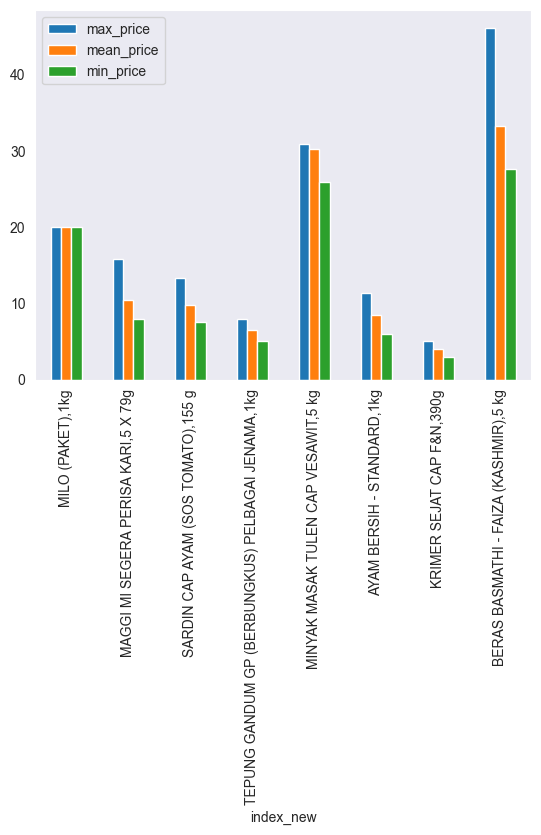

In [61]:
import seaborn as sns
sns.set_style('dark')
price_range_list[['max_price','mean_price','min_price']].plot.bar()


In [66]:
price_range_list[['max_price','mean_price','min_price']].sum()

max_price     150.570000
mean_price    122.603983
min_price     103.320000
dtype: float64

<Axes: ylabel='RM'>

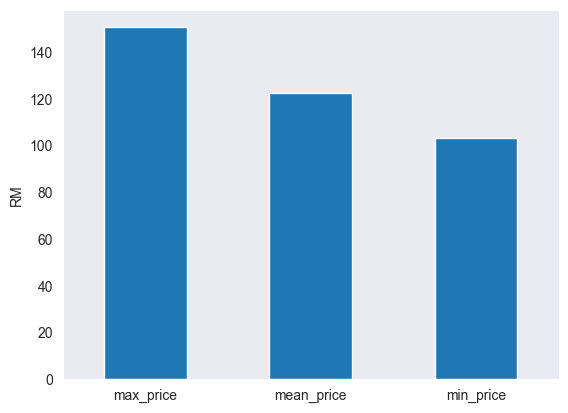

In [65]:
price_range_list[['max_price','mean_price','min_price']].sum().plot.bar(ylabel='RM',rot=0)

By district?

In [79]:

x_df = df_sep.loc[df_sep['item_code'].isin(senarai_barang)]
x_df = x_df.groupby(['district'])
x_df.head()
##x_df[x_df["district"]=="Kangar "]

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
0,2023-09-01,2,1,9.40,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
157,2023-09-01,3,1095,28.99,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
197,2023-09-01,16,1,8.49,Pasar Raya / Supermarket,PASARAYA K-CERIA (KANGAR) SDN. BHD,Perlis,Kangar,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
229,2023-09-01,16,1095,30.90,Pasar Raya / Supermarket,PASARAYA K-CERIA (KANGAR) SDN. BHD,Perlis,Kangar,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
280,2023-09-01,115,1,9.40,Pasar Raya / Supermarket,TAMPIN SHOPPING CENTRE,Negeri Sembilan,Tampin,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
...,...,...,...,...,...,...,...,...,...,...,...,...
807467,2023-09-11,10478,1095,30.90,Kedai Runcit,MIN HOE CAFE,Sarawak,Engkelili,MINYAK MASAK TULEN CAP VESAWIT,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
870573,2023-09-11,17869,1952,4.50,Pasar Mini,INDAI MINI MART,Sarawak,Pakan,KRIMER SEJAT CAP F&N,390g,KRIMER DAN SUSU TEPUNG,BARANGAN BERBUNGKUS
870575,2023-09-11,17869,1976,5.00,Pasar Mini,INDAI MINI MART,Sarawak,Pakan,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS
871647,2023-09-11,17880,1976,4.89,Pasar Mini,MELIGAI SUPERMARKET,Sarawak,Selangau,MAGGI MI SEGERA PERISA KARI,5 X 79g,MI SEGERA,BARANGAN BERBUNGKUS
